<a href="https://colab.research.google.com/github/dzervenes/Machine-Learning-module/blob/main/Unit_6_Seminar_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

 sample_data  'Unit06 iris.csv'  'Unit06 weatherAUS.csv'  'Unit06 wine.csv'


**Task A : Iris data**

**Importing the dataset**

In [ ]:
import pandas as pd
df1 = pd.read_csv('Unit06 iris.csv')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Data preprocessing**

The features were normalized using StandardScaler from sklearn.preprocessing. This ensures that all features have a mean of 0 and a standard deviation of 1, which is crucial for K-Means clustering as it is sensitive to the scale of the input features. The species column was excluded from the normalization process as it contains categorical labels. The resulting normalized features are stored in *X_normalized*.

In [22]:
from sklearn.preprocessing import StandardScaler

X = df1.drop(columns=['species'])
y = df1['species']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


**K-Means clustering (K=3)**

K-Means clustering was applied using sklearn.cluster.KMeans with
n_clusters=3, representing the assumption of three species in the dataset. The model was fitted on the normalized features (*X_normalized*), and the resulting cluster labels were stored in cluster_labels. These labels indicate the cluster assignment for each data point. A fixed *random_state=42* was used to ensure reproducibility.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

cluster_labels = kmeans.labels_
print(cluster_labels)

[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 2 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


**Cluster mapping**

A confusion matrix was generated to compare the true species labels with the cluster assignments. The LabelEncoder was used to convert the categorical species labels into numeric format to align with the numeric cluster labels. The *confusion_matrix* function was then used to compute the matrix, showing how well the clusters align with the actual species. This provides insight into the clustering performance and the overlap between clusters and true labels.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

confusion = confusion_matrix(y_encoded, cluster_labels)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


**Evaluation of clustering quality**

The clustering performance was assessed to measure the alignment between the true labels and the cluster assignments. One metric evaluates the similarity between the two label sets, adjusting for random chance, while the other quantifies the purity of the clusters. Higher values indicate better clustering quality and closer alignment with the true species labels.

In [ ]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score

ari = adjusted_rand_score(y, cluster_labels)
homogeneity = homogeneity_score(y, cluster_labels)
print(f"Adjusted Rand Index: {ari}")
print(f"Homogeneity Score: {homogeneity}")

Adjusted Rand Index: 0.4289511167236898
Homogeneity Score: 0.5334123630245353


**Interpretation**

The clustering results show moderate alignment with the true species labels. An Adjusted Rand Index of 0.4289 indicates partial agreement, while a Homogeneity Score of 0.5334 suggests moderate cluster purity. Overlapping features, particularly between versicolor and virginica, and K-Means' assumption of spherical clusters limit performance, though the clustering captures some underlying structure.

**Improving feature representation**

Principal Component Analysis (PCA) was used to reduce the dimensionality of the normalized features to two components for visualization. The clusters were plotted in the reduced space, with colors representing their cluster assignments. This visualization provides an intuitive way to observe the separation and overlap between clusters, helping to evaluate the effectiveness of the clustering.

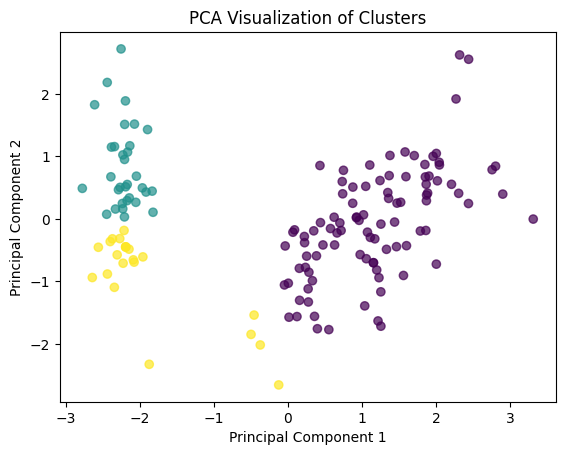

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The PCA plot shows the clusters formed by the K-Means algorithm with K=3. One cluster (on the left) is well-separated, likely representing the setosa species, which is distinct in the dataset. The other two clusters overlap significantly, reflecting the similarity in features between versicolor and virginica. This overlap demonstrates the limitations of K-Means clustering for species with overlapping feature distributions. Despite this, K-Means effectively captures some structure in the data, especially for clearly separable classes.

**K-means clustering (K=4)**

K-Means clustering was applied with K=4 to evaluate whether adding an additional cluster improves the model's performance compared to K=3.

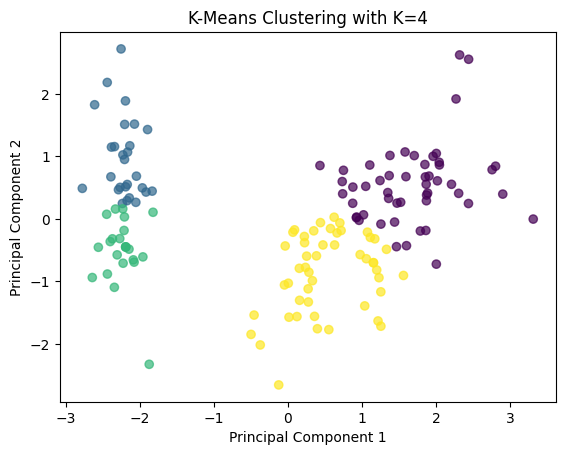

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
cluster_labels_4 = kmeans_4.fit_predict(X_normalized)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_4, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering with K=4')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The PCA visualization for K=4 shows that the dataset is divided into four clusters. One cluster on the left is distinct, likely representing setosa, which is well-separated from the others. The additional cluster (green) divides the overlapping region of versicolor and virginica, improving differentiation but still showing some overlap in these groups. This suggests that
K=4 captures finer distinctions in the data compared to K=3, though complete separation remains challenging due to the inherent similarity between certain species.

**Evaluation of clustering quality**

The clustering performance for K=4 was assessed to determine if the model performs better than the one with K=3.

In [ ]:
ari_4 = adjusted_rand_score(y, cluster_labels_4)
homogeneity_4 = homogeneity_score(y, cluster_labels_4)

print(f"Adjusted Rand Index for K=4: {ari_4}")
print(f"Homogeneity Score for K=4: {homogeneity_4}")

Adjusted Rand Index for K=4: 0.4932923881827746
Homogeneity Score for K=4: 0.6728030057213786


**Interpretation**


The clustering performance improves with K=4 compared to K=3, as indicated by the higher Adjusted Rand Index and Homogeneity Score. The ARI increased from 0.4289 to 0.4933, reflecting a better alignment with the true species labels, while the Homogeneity Score rose from 0.5334 to 0.6728, showing that the clusters are more internally consistent. This suggests that adding a fourth cluster helps capture finer distinctions within the data, particularly in the overlapping regions of versicolor and virginica.

**Task B : Wine data**

**Importing the dataset**

In [ ]:
df2 = pd.read_csv('Unit06 wine.csv')
df2.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Data preprocessing**

The dataset is prepared by separating the features and class labels. The Wine column, which represents the true class labels (1, 2, 3), is excluded from the clustering process. The remaining features are normalized to ensure all features have a mean of 0 and a standard deviation of 1, allowing the clustering algorithm to treat all features equally regardless of their scale.

In [ ]:
X = df2.drop(columns=['Wine'])
y = df2['Wine']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

**K-means clustering (K=3)**

K-Means clustering is applied with K=3, assigning each data point to one of three clusters. The resulting cluster labels indicate the cluster membership for each point.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_normalized)

**Evaluating clustering performance**

The clustering performance is evaluated by comparing the predicted cluster labels with the true labels using a confusion matrix, Adjusted Rand Index, and Homogeneity Score. These metrics assess how well the clusters align with the actual classes and the consistency within each cluster.

In [18]:
confusion = confusion_matrix(y, cluster_labels)
print("Confusion Matrix:")
print(confusion)

ari = adjusted_rand_score(y, cluster_labels)
homogeneity = homogeneity_score(y, cluster_labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Homogeneity Score: {homogeneity}")

Confusion Matrix:
[[ 0  0  0  0]
 [ 0  0 59  0]
 [65  3  3  0]
 [ 0 48  0  0]]
Adjusted Rand Index: 0.8974949815093207
Homogeneity Score: 0.8788432003662366


**Interpretation**

The confusion matrix shows that the clustering aligns well with the true class labels, although there is some misalignment in one class. The Adjusted Rand Index of 0.8975 indicates a strong agreement between the predicted clusters and the true labels, while the homogeneity score of 0.8788 reflects highly pure clusters. Overall, the clustering model performs effectively, closely capturing the structure of the data.

**Improving feature representation**

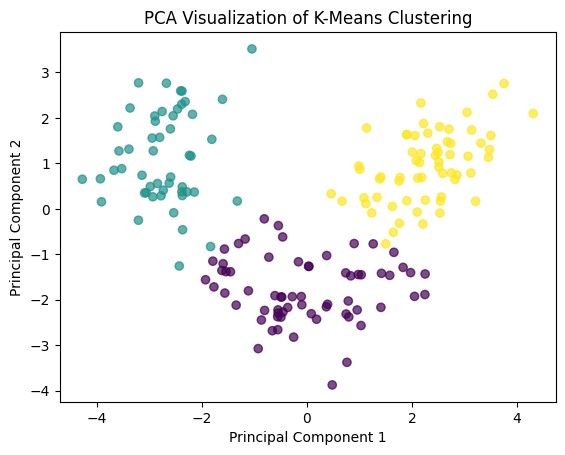

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('PCA Visualization of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The PCA visualization shows three distinct clusters corresponding to the K-Means clustering results with K=3. The clusters are well-separated in the two-dimensional space, indicating that the clustering algorithm effectively captured the structure of the dataset. This aligns with the high Adjusted Rand Index and Homogeneity Score, confirming the model's strong performance.

**Elbow method analysis**

The code evaluates the optimal number of clusters by calculating the inertia for
K values ranging from 1 to 9. The results are plotted to identify the "elbow point," where adding more clusters yields diminishing returns in reducing inertia, helping determine the best K for clustering.

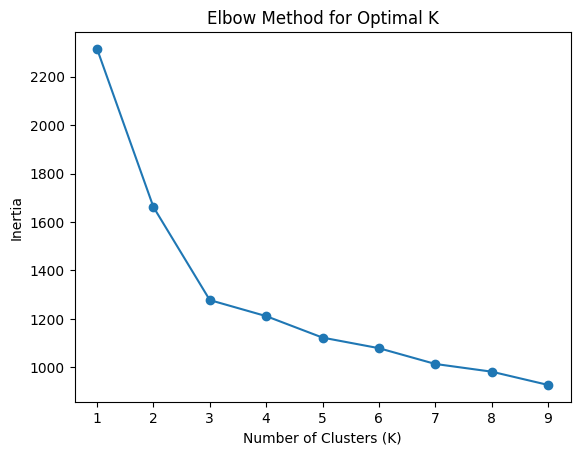

In [20]:
inertias = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertias.append(kmeans.inertia_)

plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

**Interpretation**

The elbow curve shows a significant drop in inertia at K=3, suggesting that three clusters balance compactness and simplicity well. Beyond
K=3, the rate of decrease in inertia slows, indicating diminishing returns in adding more clusters. This supports K=3 as the optimal number of clusters for the dataset.

K-means clustering (K=4)

K-Means clustering withK=4 is performed to evaluate whether increasing the number of clusters improves the model's performance, similar to Task A. This analysis helps determine if the elbow method is reliable in suggesting K=3 as the optimal choice or if additional clusters provide better alignment with the true labels.

In [24]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
cluster_labels_4 = kmeans_4.fit_predict(X_normalized)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

confusion_4 = confusion_matrix(y_encoded, cluster_labels_4)
print("Confusion Matrix for K=4:")
print(confusion_4)

ari_4 = adjusted_rand_score(y_encoded, cluster_labels_4)
homogeneity_4 = homogeneity_score(y_encoded, cluster_labels_4)

print(f"Adjusted Rand Index for K=4: {ari_4}")
print(f"Homogeneity Score for K=4: {homogeneity_4}")

Confusion Matrix for K=4:
[[ 0 27 23  0]
 [12  0  0 38]
 [39  0  0 11]
 [ 0  0  0  0]]
Adjusted Rand Index for K=4: 0.4932923881827746
Homogeneity Score for K=4: 0.6728030057213786


**Analysis**

The results show that K=3 outperforms
K=4. With an Adjusted Rand Index of 0.8975 and a Homogeneity Score of 0.8788,
K=3 provides stronger alignment with the true labels and higher cluster consistency. In contrast, K=4 lowers both metrics (ARI: 0.4933, Homogeneity: 0.6728), indicating that adding a fourth cluster introduces misclassification without improving performance. This confirms that the elbow method's suggestion of K=3 as the optimal choice is reliable.

**Task C : WeatherAUS data**